In [1]:
# General
import sys
import numpy as np
from pickle import load, dump
sys.path.insert(0, '..')
# Notakto
import util
from visual import GameWithConfidences
from environment import Env
from agents.random_agent import RandomAgent
from agents.human import Human
import agents.qtree as qtree
import statistics

Name		23
Iteration	222
Architecture	[17, 1000, 400, 200, 17]
Activation	Relu Hidden
Simulations	20000


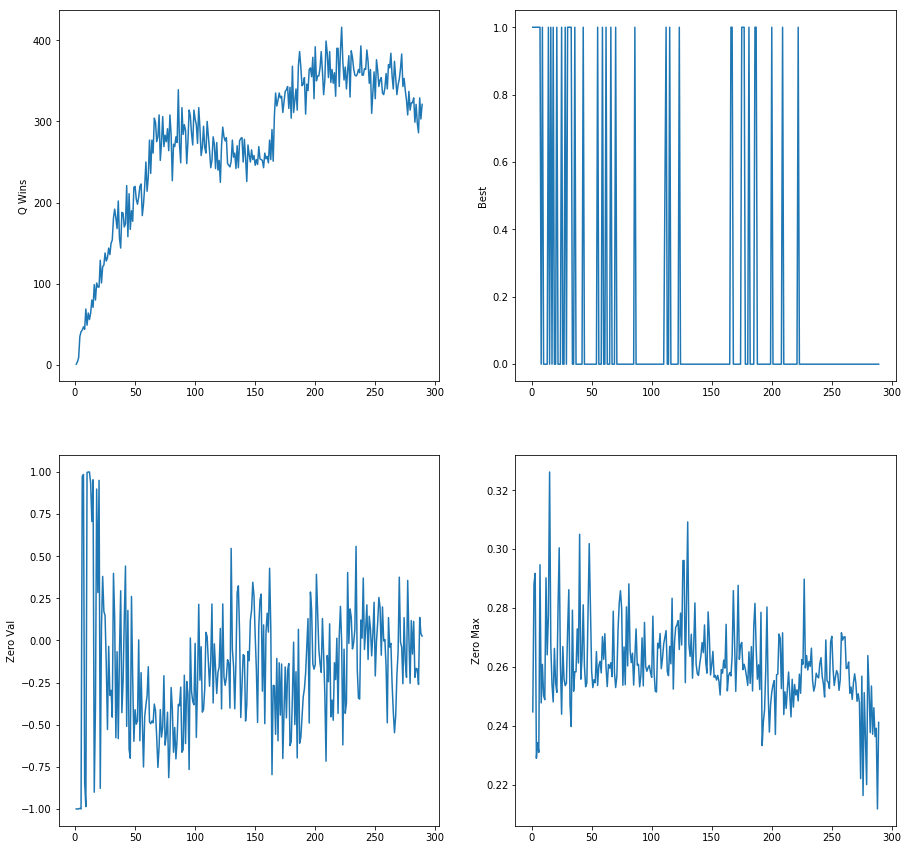

In [14]:
# Load the desired agent
version = 23
size = 4
PATH = "agents/saves/{size}x{size}/{version}_best.npz".format(size = size, version = version)
STATS_PATH = "agents/saves/{size}x{size}/{version}.stats".format(size = size, version = version)
#PATH = "agents/saves/board/{size}x{size}/{version}_best.npz".format(size = size, version = version)
#STATS_PATH = "agents/saves/board/{size}x{size}/{version}.stats".format(size = size, version = version)
AGENT_PLAYER = 2
agent = util.load_agent(PATH, qtree.QTree)
stats = statistics.group_stats_by_type(statistics.get_stats(STATS_PATH))
# Output the description of given agent
print("Name\t\t{}\nIteration\t{}\nArchitecture\t{}\nActivation\t{} {}\nSimulations\t{}".format(
    agent.name, agent.iteration, agent.layers, agent.activation_func_name.title(), agent.activation_type.title(), stats["meta"]["simulations"]))
# Create game setting
env = Env(agent.size)
r = RandomAgent(env)
h = Human()
# Display stats
desired = ["q_wins", "best", "zero_val", "zero_max"]
statistics.plot_value(stats, desired, fig_size = (15, 15), best_fit = False)

In [20]:
max(stats["q_wins"][:112])/10

33.9

In [23]:
np.array(stats["q_wins"][160:200])/10

array([27.7, 25.3, 29. , 25.1, 30.7, 33.5, 31.9, 32.6, 33.5, 32.9, 33.1,
       31.1, 32.4, 33.7, 33.9, 34.3, 31.6, 34.2, 30.4, 36.8, 31.1, 32.6,
       34. , 31.4, 36.9, 38.6, 36.7, 34.4, 34.6, 35.4, 30.9, 34.6, 33.8,
       36.4, 36.6, 35.5, 37.9, 32.8, 39.2, 35. ])

In [29]:
stats["q_wins"][113]

281

In [30]:
len(stats["q_wins"])

288

In [27]:
np.array(stats["best"][112:176])*1

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [ ]:
# Run a visual game against a random opponent
players = [agent, r]
GameWithConfidences(env, players[AGENT_PLAYER - 1], players[2 - AGENT_PLAYER], show_confidences = True)

In [ ]:
# Run a visual game against a human
players = [agent, h]
GameWithConfidences(env, players[AGENT_PLAYER - 1], players[2 - AGENT_PLAYER], show_confidences = True)

In [8]:
# Convert old save to new API
# Load the file
for i in [1, 2, 3, 4]+list(range(10, 23)):
    PATH = "agents/saves/4x4/{}_best.npz".format(i)
    with open(PATH, "rb") as f:
        old = load(f)
    # Change the save dictionary
    old["mode"] = old["act_mode"]
    del old["act_mode"]
    # Save the converted file
    with open(PATH, "wb") as f:
        dump(old, f)

In [6]:
[1, 2, 3, 4]+ list(range(10, 23))

[1, 2, 3, 4, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]